# 1. Recurrence Plot


 - **Time series**

The *time series* ($S$) is a set of observations. It can be defined as

$$S = \left\lbrace s_{1}, s_{2}, \cdots, s_{M} \right\rbrace,$$ 

where $s_{i}$ is the observation recorded at time $i = \Delta t$ (where $\Delta t$ is the sampling time) and $M$ is the number of observations.

<br>

 - **Phase space trajectory**

The phase space trajectory can be reconstructed from a time series $S$ using *time delay embedding method* [1]

$$ \vec{x}_{i} = \left( s_{i}, s_{i+\tau}, s_{i+2\tau}, \cdots, s_{i+(m-1)\tau} \right), $$

where $m$ is an embedding dimension and $\tau$ is a time delay. Usually, the embedding dimensiom and the time delay can be estimated from the time series $S$ using false nearest neighbor algorithm [2,3] and mutual information function [4].

 - **Distance matrix**


The distance matrix ($D$) stores the distance between pairs of states. It can be mathematically expressed as

$$D_{i,j}^{m} = \left \| \vec{x}_{i}-\vec{x}_{j} \right \|, \;\; \vec{x}_{i}, \vec{x}_{j} \in \mathbb{R}^{m} \;\; i, j = \left\lbrace 1, 2, \cdots, N \right\rbrace,$$

where $N = M - (m - 1) \tau$ is the number of considered states $\vec{x}$, $m$ is an embedding dimension, $\tau$ is a time delay and $\left \| \cdot \right \|$ is a norm. 

 - **Recurrence matrix**

A recurrence is defined when the distance between two states $\vec{x}_{i}$ and $\vec{x}_{j}$  is smaller than a threshold $\rho$. Thus, the recurrence matrix (*R*) is defined by

$$R_{i,j}^{m,\rho} = \theta \left( \left \| \vec{x}_{i}-\vec{x}_{j} \right \| - \rho \right), \;\; \vec{x}_{i} \in \mathbb{R}^{m}, \;\; i, j = \left\lbrace 1, 2, \cdots, N \right\rbrace,$$

where $N = M - (m - 1) \tau$ is the number of considered states $\vec{x}$, $m$ is an embedding dimension, $\tau$ is a time delay, $\rho$ is a threshold distance, $\left \| \cdot \right \|$ is a norm and $\theta \left( \cdot \right)$ is the Heaviside function that guarantees

$$ R_{i,j}^{m\rho} = \begin{cases}
1, & \text{ if the distance between } \vec{x}_{i} \text{ and } \vec{x}_{j} \text{ is smaller than } \rho \\ 
0, & \text{ otherwise }
\end{cases} . $$

 - **Recurrence plot**

The Recurrence Plot (RP) [5] is an advanced technique of nonlinear data analysis which reveals all the times when the phase space trajectory visits roughly the same area in the phase space. It is the visualization of a recurrence matrix. If $R_{i,j}^{m,\tau} = 1$, a black dot is placed at position $(i,j)$ of the graph. If $R_{i,j}^{m,\tau} = 0$, a white dot is marked at position $(i,j)$ of the plot. 

## 1.1 Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import locale
import recurrence as rp

In [2]:
# For Brazil
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')
mpl.rcParams['axes.formatter.use_locale'] = True

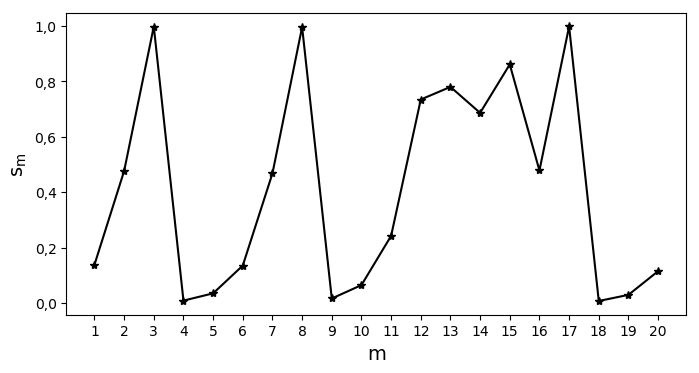

In [3]:
# Creating and plotting the time series
data = [0.1382232581, 0.4764703560, 0.9977854234, 0.0088386889, 0.0350422661, 0.1352572226, 0.4678508254, 0.9958657223, 0.0164687418, 
0.0647900894, 0.2423693348, 0.7345057614, 0.7800281914, 0.6863368481, 0.8611143162, 0.4783858026, 0.9981313059, 0.0074608084, 0.0296205790, 0.1149728010]

plt.figure(num= None, figsize=((8,4)), dpi=100)
plt.plot([x for x in range(1, len(data)+1)], data, '-*k')
plt.xlabel('m', fontsize=14)
plt.ylabel(r'$\mathrm{s_{m}}$', fontsize = 14)
plt.xticks([x for x in range(1, len(data)+1)], [x for x in range(1, len(data)+1)])
plt.show()

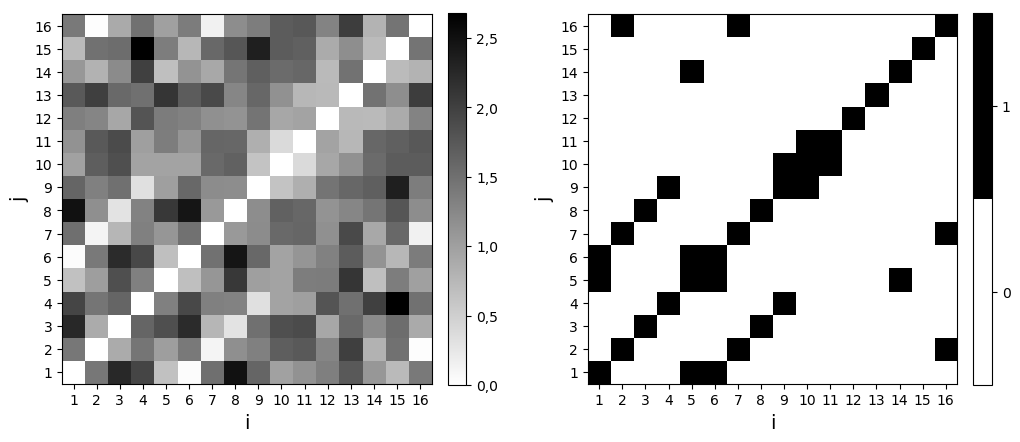

In [4]:
# Creating and plotting the distance matrix and recurrence plot using Manhattan distance
dimension, delay, threshold, norm = 3, 2, 0.7, "manhattan"
distance_matrix = rp.distance_matrix(data, dimension, delay, norm)
recurrence_matrix = rp.recurrence_matrix(data, dimension, delay, threshold, norm)
LIN = len(distance_matrix[:,0])

plt.figure(num=None, figsize=((12,6)), dpi= 100)
plt.subplots_adjust(wspace = 0.3)
plt.subplot(1,2,1)
plt.imshow(distance_matrix, cmap = 'binary')
plt.axis([-0.5, LIN-0.5, -0.5, LIN-0.5])
plt.xlabel('i', fontsize=14)
plt.ylabel('j', fontsize=14)
plt.xticks([x for x in range(LIN)], [x+1 for x in range(LIN)])
plt.yticks([x for x in range(LIN)], [x+1 for x in range(LIN)])
plt.colorbar(fraction=0.046, pad=0.04)
plt.subplot(1,2,2)
cmap = plt.get_cmap('binary', 2)
plt.imshow(recurrence_matrix, cmap = cmap, vmin = 0, vmax = 1)
plt.axis([-0.5, LIN-0.5, -0.5, LIN-0.5])
plt.xlabel('i', fontsize=14)
plt.ylabel('j', fontsize=14)
plt.xticks([x for x in range(LIN)], [x+1 for x in range(LIN)])
plt.yticks([x for x in range(LIN)], [x+1 for x in range(LIN)])
cbar = plt.colorbar(fraction=0.046, pad=0.04, ticks=[0.25,0.75])
cbar.ax.set_yticklabels(['0', '1'])
plt.show()

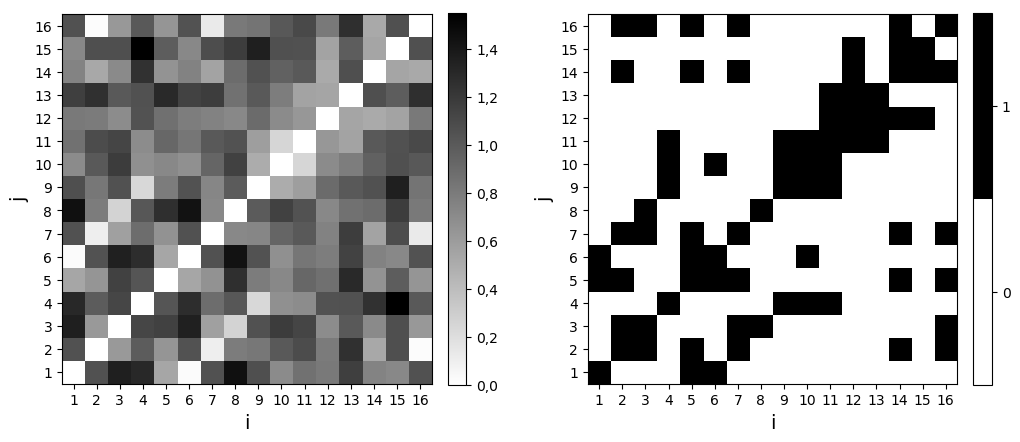

In [5]:
# Creating and plotting the distance matrix and recurrence plot using Euclidean distance
dimension, delay, threshold, norm = 3, 2, 0.7, "euclidean"
distance_matrix = rp.distance_matrix(data, dimension, delay, norm)
recurrence_matrix = rp.recurrence_matrix(data, dimension, delay, threshold, norm)
LIN = len(distance_matrix[:,0])

plt.figure(num=None, figsize=((12,6)), dpi= 100)
plt.subplots_adjust(wspace = 0.3)
plt.subplot(1,2,1)
plt.imshow(distance_matrix, cmap = 'binary')
plt.axis([-0.5, LIN-0.5, -0.5, LIN-0.5])
plt.xlabel('i', fontsize=14)
plt.ylabel('j', fontsize=14)
plt.xticks([x for x in range(LIN)], [x+1 for x in range(LIN)])
plt.yticks([x for x in range(LIN)], [x+1 for x in range(LIN)])
plt.colorbar(fraction=0.046, pad=0.04)
plt.subplot(1,2,2)
cmap = plt.get_cmap('binary', 2)
plt.imshow(recurrence_matrix, cmap = cmap, vmin = 0, vmax = 1)
plt.axis([-0.5, LIN-0.5, -0.5, LIN-0.5])
plt.xlabel('i', fontsize=14)
plt.ylabel('j', fontsize=14)
plt.xticks([x for x in range(LIN)], [x+1 for x in range(LIN)])
plt.yticks([x for x in range(LIN)], [x+1 for x in range(LIN)])
cbar = plt.colorbar(fraction=0.046, pad=0.04, ticks=[0.25,0.75])
cbar.ax.set_yticklabels(['0', '1'])
plt.show()

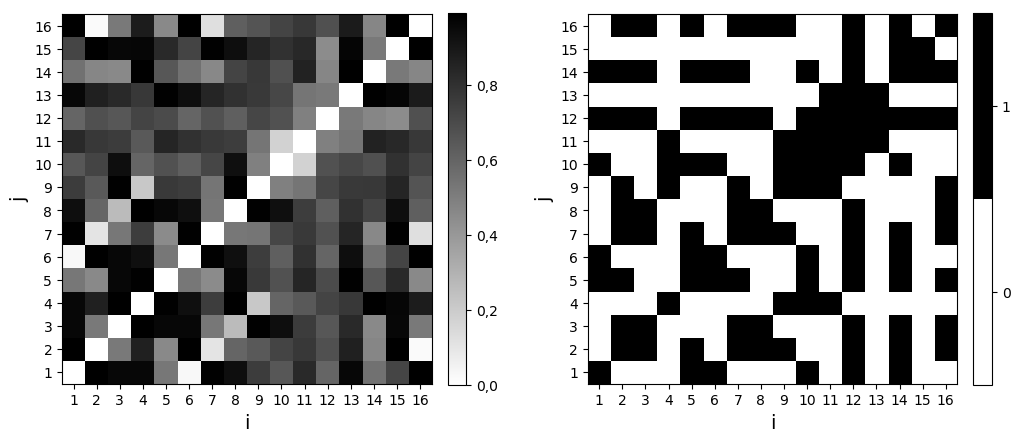

In [6]:
# Creating and plotting the distance matrix and recurrence plot using Supremum distance
dimension, delay, threshold, norm = 3, 2, 0.7, "supremum"
distance_matrix = rp.distance_matrix(data, dimension, delay, norm)
recurrence_matrix = rp.recurrence_matrix(data, dimension, delay, threshold, norm)
LIN = len(distance_matrix[:,0])

plt.figure(num=None, figsize=((12,6)), dpi= 100)
plt.subplots_adjust(wspace = 0.3)
plt.subplot(1,2,1)
plt.imshow(distance_matrix, cmap = 'binary')
plt.axis([-0.5, LIN-0.5, -0.5, LIN-0.5])
plt.xlabel('i', fontsize=14)
plt.ylabel('j', fontsize=14)
plt.xticks([x for x in range(LIN)], [x+1 for x in range(LIN)])
plt.yticks([x for x in range(LIN)], [x+1 for x in range(LIN)])
plt.colorbar(fraction=0.046, pad=0.04)
plt.subplot(1,2,2)
cmap = plt.get_cmap('binary', 2)
plt.imshow(recurrence_matrix, cmap = cmap, vmin = 0, vmax = 1)
plt.axis([-0.5, LIN-0.5, -0.5, LIN-0.5])
plt.xlabel('i', fontsize=14)
plt.ylabel('j', fontsize=14)
plt.xticks([x for x in range(LIN)], [x+1 for x in range(LIN)])
plt.yticks([x for x in range(LIN)], [x+1 for x in range(LIN)])
cbar = plt.colorbar(fraction=0.046, pad=0.04, ticks=[0.25,0.75])
cbar.ax.set_yticklabels(['0', '1'])
plt.show()

## 1.2 References

[1] Takens F., Detecting strange attractors in turbulence, In: Rand D., Young LS. (eds) Dynamical Systems and Turbulence, Warwick 1980. Lecture Notes in Mathematics, vol 898. Springer, Berlin, Heidelberg (1981). DOI: [10.1007/BFb0091924](https://doi.org/10.1007/BFb0091924)

[2] M. B. Kennel, R. Brown, H. D. I. Abarbanel, Determining embedding dimension for phase-space reconstruction using a geometrical construction, Physical Review A, 45(6), 3403-3411p (1992). DOI: [10.1103/PhysRevA.45.3403](https://doi.org/10.1103/PhysRevA.45.3403)

[3] L. Cao, Practical method for determining the minimum embedding dimension of a scalar time series, Physica D: Nonlinear Phenomena, 110(12), 43-50p (1997). DOI: [10.1016/S0167-2789(97)00118-8](https://doi.org/10.1016/S0167-2789(97)00118-8)

[4] A. Fraser, H. Swinney, Independent coordinates for strange attractors from mutual information, Physical Review A, 33(2), 1134-1140p (1986). DOI: [10.1103/PhysRevA.33.1134](https://doi.org/10.1103/PhysRevA.33.1134)

[5] J.-P. Eckmann, S. Oliffson Kamphorst and D. Ruelle, Recurrence Plots of Dynamical Systems, Europhysics Letters, 4(9), 973-977p (1987). DOI: [10.1209/0295-5075/4/9/004](https://doi.org/10.1209/0295-5075/4/9/004)